## 乳腺癌数据下探索核函数的性质
### 3.1 探索kernel该如何选取

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time 
import datetime

In [2]:
data = load_breast_cancer()
x = data.data
y = data.target
print("shape of x:",x.shape)
print("shape of y:",y.shape)

shape of x: (569, 30)
shape of y: (569,)


In [3]:
np.unique(y)## 说明乳腺癌数据只有2个标签：0，1

array([0, 1])

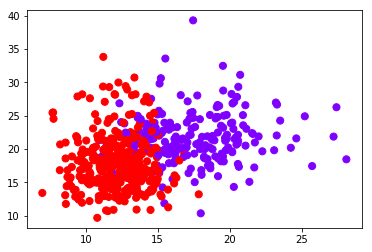

In [4]:
plt.scatter(x[:,0],x[:,1]
           ,c=y
           ,s=50
           ,cmap="rainbow")
plt.show()

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=300)

In [17]:
kernel = ["linear","poly","rbf","sigmoid"]

for i in kernel:
    time0 = time()#记录此时的时间戳
    clf = SVC(kernel=i
             ,gamma="auto"
             ,C=1.0
             ,degree=1
             ,coef0=0.0
             ,cache_size=5000
             ).fit(x_train,y_train)
    print("The accuracy under kernel %s is %f" % (i,clf.score(x_test,y_test)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))     

The accuracy under kernel linear is 0.947368
00:01:321186
The accuracy under kernel poly is 0.935673
00:00:136127
The accuracy under kernel rbf is 0.590643
00:00:084946
The accuracy under kernel sigmoid is 0.590643
00:00:007995


如果这里的degree没有设置为1，其实这个代码耗时会特别长。因为poly默认degree=3,使得它在三次方上计算。这里改degree=1,接近线性。
cache_size是计算机所有内存，默认是200计算超慢。
这里看到rbf这个核的计算结果好差啊，只有59%。但是运算速度挺快的，是不是可以通过调整参数来改变正确率？
事实上，rbf应该也能在线性数据上表现的优秀，怎么结果那么差呢？
首先针对一个数据集，linear可以，那证明模型本身不会有问题。问题很可能出现在数据的量纲上，归一化或者标准化很可能能解决问题。
让我们来探索下乳腺癌数据的量纲：

In [18]:
import pandas as pd
data = pd.DataFrame(x)

In [20]:
data.describe().T #通过看均值和方差就知道量纲有问题，这里我们用preprocessing立面的StrandarScale模块标准化，让均值和方差符合正态分布

,count,mean,std,min,25%,50%,75%,max
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
9,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [22]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
data = pd.DataFrame(x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,-3.356034e-17,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
1,569.0,-7.960826e-17,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
2,569.0,-3.824318e-17,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
3,569.0,-2.341419e-18,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
4,569.0,-4.526744e-17,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
5,569.0,1.209733e-17,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
6,569.0,-5.463312e-18,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
7,569.0,5.931596e-17,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
8,569.0,1.580458e-16,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
9,569.0,-7.999850e-18,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


现在已经将数据统一了量纲，我们来看下在这几个kernel下的表现

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=300)

In [28]:
kernel = ["linear","poly","rbf","sigmoid"]
for i in kernel:
    time0 = time()
    clf = SVC(kernel=i
             ,gamma = "auto"
             ,degree = 1
             ,coef0 = 0
             ,C = 1
             ,cache_size=5000
             ).fit(x_train,y_train)
    print("The accuracy under the kernel %s is %f"%(i,clf.score(x_test,y_test)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under the kernel linear is 0.982456
00:00:016988
The accuracy under the kernel poly is 0.964912
00:00:009995
The accuracy under the kernel rbf is 0.982456
00:00:012991
The accuracy under the kernel sigmoid is 0.953216
00:00:006996


这个时候所有核函数的正确率都上升了。说明我们的rbf表现还是很优秀的，得到了98.2456%的正确率，与linear核结果一致。但是我们要记得rbf还有一个参数可以调节：gamma,调整gamma很可能会提高预测结果。
gamma = "auto"--默认是1/features,也就是1/30.
现在我们试下调整gamma

0.9824561403508771 0.04081632748979592


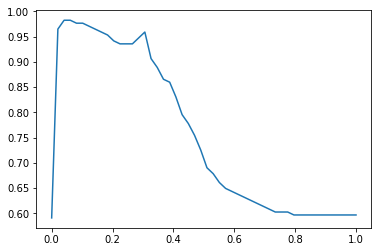

In [30]:
score = []
gamma_range = np.linspace(0.000000001,1,50)
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma=i,cache_size=5000).fit(x_train,y_train)
    score.append(clf.score(x_test,y_test))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

0.9824561403508771 0.0339322177189533


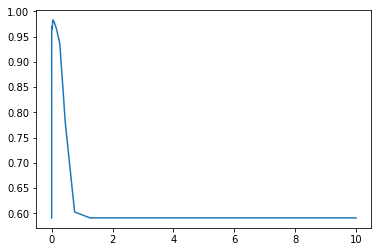

In [31]:
score = []
gamma_range = np.logspace(-10,1,50) #50**(-10)----50**(1)
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma=i,cache_size=5000).fit(x_train,y_train)
    score.append(clf.score(x_test,y_test))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

通过上面的学习曲线，很容易就找到了最优的gamma值。
对于poly核函数，它的影响参数包含了：gamma,coef0和degree.
三个参数共同作用在一个数学公式上，我们一般选择玩个够搜索来确定参数

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
time0 = time()
gamma_range = np.linspace(0.000000001,1,50)
coef0_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range
                 ,coef0 = coef0_range)
cv = StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=300)
grid = GridSearchCV(SVC(kernel="poly"
                       ,degree=1
                       ,cache_size=5000)
                       ,param_grid=param_grid
                       ,cv=cv)
grid.fit(x,y)
print("The best parameters are %s with a score of %f"%(grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 0.0, 'gamma': 0.12244898046938776} with a score of 0.974269
00:37:879641


我们试下采用交叉验证，不设置cv的格式

In [33]:
time0 = time()
gamma_range = np.linspace(0.000000001,1,50)
coef0_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range
                 ,coef0 = coef0_range)
# cv = StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=300)
grid = GridSearchCV(SVC(kernel="poly"
                       ,degree=1
                       ,cache_size=5000)
                       ,param_grid=param_grid
                       ,cv=10)
grid.fit(x_train,y_train)
print("The best parameters are %s with a score of %f"%(grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 0.0, 'gamma': 0.22448979669387756} with a score of 0.977387
01:22:107262


## 软间隔，参看平衡参数的影响

0.9824561403508771 0.6220408163265306


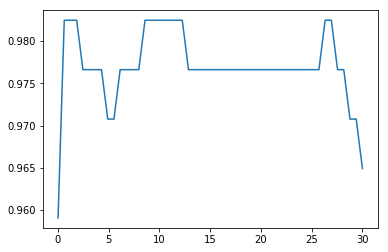

In [35]:
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(x_train,y_train)
    score.append(clf.score(x_test,y_test))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()   

0.9824561403508771 1.2340816326530613


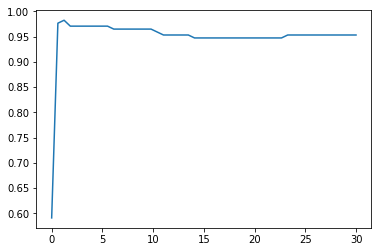

In [36]:
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf"
              ,C=i
              ,cache_size=5000
              ,gamma=0.03393).fit(x_train,y_train)
    score.append(clf.score(x_test,y_test))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show() 

In [14]:
sample_list = ["linear","poly","rbf","sigmoid"]
for i in sample_list:
      print(i)

linear
poly
rbf
sigmoid
